In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
data = np.load("assignment6.npz")
# The data that you will read in
scores_small = data['scores_small']
scores_large = data['scores_large']
labels_small = data['labels_small']
labels_large = data['labels_large']

In [5]:
def plot_roc(fpr, tpr):
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', linewidth=2)
  plt.plot([0, 1], [0, 1], color='black', linestyle='--')

  # Add labels and title
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')

  # Add grid and legend
  plt.grid(True)
  plt.legend(['ROC Curve'], loc='lower right')

  # Show the plot
  plt.show()

In [35]:
def roc_range(scores, labels, maxfpr, minfpr = 0):
  fpr_in_range, tpr_in_range, auc_in_range = np.array([]), np.array([]), []
  threshold = 0.01
  min_val = min(scores) - threshold
  max_value = max(scores) + threshold
  for i in np.arange(max_value,min_val,-threshold):
    TP = TN = FP = FN = 0
    for pred, actual in zip(scores, labels):
        if pred >=i and actual == 1:
            TP += 1
        elif pred < i and actual == 0:
            TN += 1
        elif pred >= i and actual == 0:
            FP += 1
        elif pred < i and actual == 1:
            FN += 1
    temp = TP/(TP+FP) if TP+FP != 0 else 1
    if temp>= 0.9 and temp<0.91:
      print(temp,i, (TP+TN)/(TP+FP+TN+FN))
    tpr_in_range = np.append(tpr_in_range, TP/(TP+FN))
    fpr_in_range = np.append(fpr_in_range, FP/(FP+TN))
  indices = np.where((fpr_in_range >= minfpr) & (fpr_in_range <= maxfpr))
  # Extract the FPR, TPR, and thresholds within the specified range
  fpr_in_range = fpr_in_range[indices]
  tpr_in_range = tpr_in_range[indices]
  auc_in_range = np.trapz(tpr_in_range,fpr_in_range)
  return fpr_in_range, tpr_in_range, auc_in_range


### Plot the ROC curve and calculate the AUC for the following ranges:

0.9088050314465409 1.1614758886208891 0.63
0.9099378881987578 1.1514758886208893 0.632
0.9054441260744985 1.12147588862089 0.6415


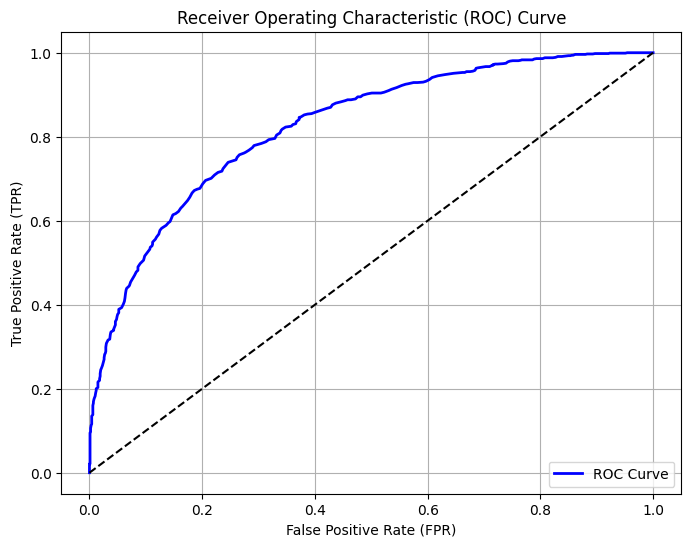

AUC: 0.824524


In [36]:
# @title Question 1
fpr_in_range, tpr_in_range, auc_in_range = roc_range(scores_large,labels_large, 1.0,0)
plot_roc(fpr_in_range,tpr_in_range)
print("AUC:",auc_in_range)

0.9088050314465409 1.1614758886208891
0.9099378881987578 1.1514758886208893
0.9054441260744985 1.12147588862089


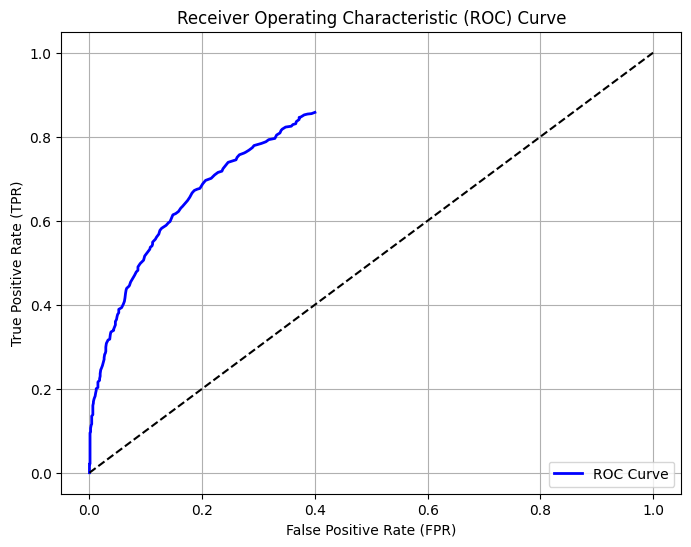

AUC: 0.2523285


In [8]:
# @title Question 2
fpr_in_range, tpr_in_range, auc_in_range = roc_range(scores_large,labels_large, 0.4,0)
plot_roc(fpr_in_range,tpr_in_range)
print("AUC:",auc_in_range)

0.9088050314465409 1.1614758886208891
0.9099378881987578 1.1514758886208893
0.9054441260744985 1.12147588862089


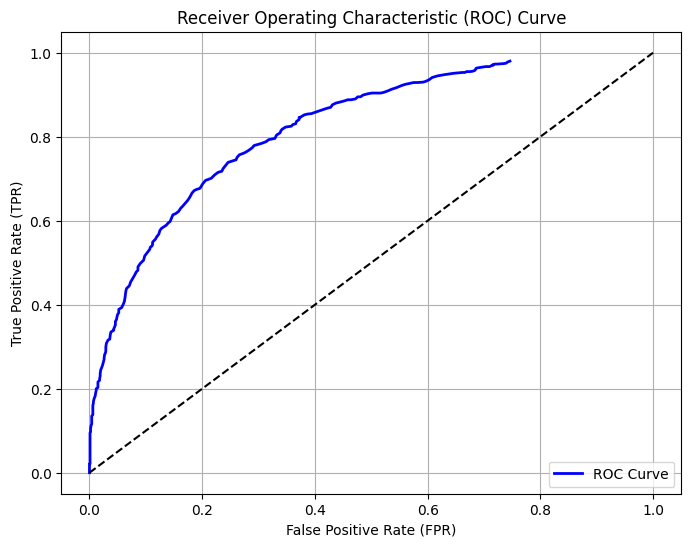

AUC: 0.5722555


In [9]:
# @title Question 3
fpr_in_range, tpr_in_range, auc_in_range = roc_range(scores_large,labels_large, 0.75,0)
plot_roc(fpr_in_range,tpr_in_range)
print("AUC:",auc_in_range)

0.9088050314465409 1.1614758886208891
0.9099378881987578 1.1514758886208893
0.9054441260744985 1.12147588862089


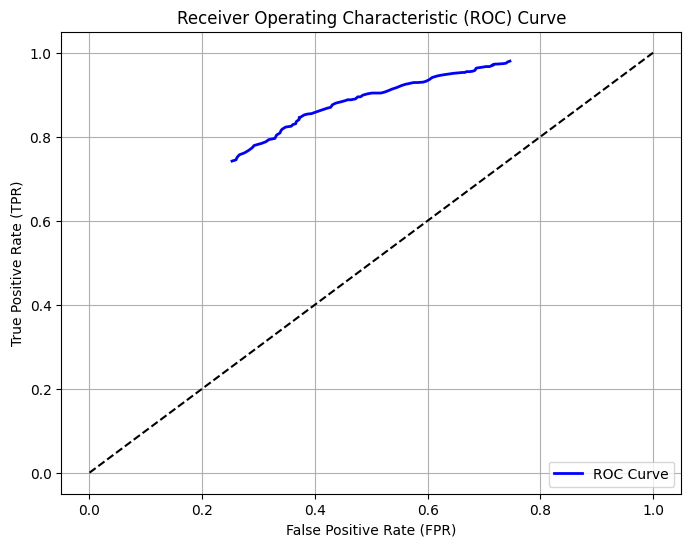

AUC: 0.437881


In [10]:
# @title Question 4
fpr_in_range, tpr_in_range, auc_in_range = roc_range(scores_large,labels_large, 0.75,0.25)
plot_roc(fpr_in_range,tpr_in_range)
print("AUC:",auc_in_range)

In [21]:
def roc_range(scores, labels, maxfpr, minfpr = 0):
  fpr_in_range, tpr_in_range, auc_in_range = np.array([]), np.array([]), []
  TP, TN, FP, FN = 0, 0, 0, 0
  fpr_in_range, tpr_in_range = [], []
  prev_score = float('inf')
  auc_in_range = 0
  prev_tpr = 0
  sorted_arrays = sorted(zip(scores, labels))
  for score, actual in sorted_arrays:
      if score != prev_score:
          fpr = FP / (FP + TN) if FP + TN > 0 else 0
          tpr = TP / (TP + FN) if TP + FN > 0 else 0
          auc_in_range += (fpr * (tpr + prev_tpr) / 2)
          prev_tpr = tpr
          prev_score = score
      if score >= prev_score and actual == 1:
          TP += 1
      elif score < prev_score and actual == 0:
          TN += 1
      elif score >= prev_score and actual == 0:
          FP += 1
      elif score < prev_score and actual == 1:
          FN += 1
      fpr = FP / (FP + TN) if FP + TN > 0 else 0
      if minfpr <= fpr <= maxfpr:
          fpr_in_range.append(fpr)
          tpr_in_range.append(tpr)
  fpr = FP / (FP + TN) if FP + TN > 0 else 0
  tpr = TP / (TP + FN) if TP + FN > 0 else 0
  auc_in_range += (fpr * (tpr + prev_tpr) / 2)  # Trapezoidal rule
  return np.array(fpr_in_range), np.array(tpr_in_range), auc_in_range


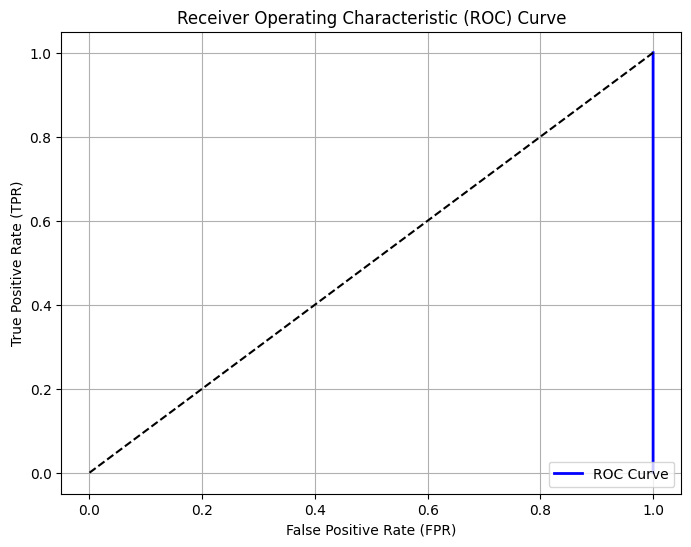

AUC: 1950.5


In [22]:
fpr_in_range, tpr_in_range, auc_in_range = roc_range(scores_large,labels_large, 1.0,0)
plot_roc(fpr_in_range,tpr_in_range)
print("AUC:",auc_in_range)